## Import the libraries and load the train dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [3]:
#The train dataset is in excel format
data_train = pd.read_excel("data/Data_Train.xlsx")
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Total_Stops contains 1 null value, drop the null value
data_train.dropna(inplace= True)

In [6]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
#check the year of the dataset
pd.to_datetime(data_train["Date_of_Journey"]).dt.year.value_counts()

2019    10682
Name: Date_of_Journey, dtype: int64

- All the column variables(except price which is the target variables) are object type
- The data is of 2019 year

## EDA

- 1. **Date_of_Journey** is an object type, Convert that into **datetime** and extract its month and day.
- 2. **Dep_Time** and **Arrival_Time** is an object type, Convert that into **datetime** and extract its hours and minutes
- 3. **Duration** is an object type, Convert that into **list** and extract its hours and minutes
- 4. **Categorical data**
       - 4.1. Nominal data- in any order - **use OneHotEnconding** - **Airline,Source,Destination**
            - 4.1.1 Create categorical plots w.r.t Price
       -  4.2. Ordinal data - in ordered form- hence use **Label Encoder** - **Total_Stops**

In [8]:
data_train["Journey_month"] = pd.to_datetime(data_train["Date_of_Journey"], format= "%d/%m/%Y").dt.month
data_train["Journey_day"] = pd.to_datetime(data_train["Date_of_Journey"], format= "%d/%m/%Y").dt.day
data_train.drop(columns =["Date_of_Journey"], inplace= True)

In [9]:
def hour_and_minute(col):
    data_train[col+"_hour"] = pd.to_datetime(data_train[col]).dt.hour
    data_train[col+"_minute"] = pd.to_datetime(data_train[col]).dt.minute
    return data_train[col+"_hour"], data_train[col+"_minute"]

In [10]:
hour_and_minute("Dep_Time")
hour_and_minute("Arrival_Time")
data_train.drop(columns = ["Dep_Time", "Arrival_Time"], inplace= True)

In [11]:
data_train.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [12]:
duration = list(data_train["Duration"])
for i in range(len(duration)):
    
    #If the duration contains only hours or only minutes
    if len(duration[i].split()) !=2: 
        # If "h" then Adds 0 minute 
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #strip --> removes spaces at the begining and at the end of the string
        else: #If "m" the  Add "0 hours"
            duration[i] = "0h "  + duration[i]
            
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    duration_minutes.append(int(duration[i].split(sep ="m")[0].split()[-1]))

In [13]:
data_train["duration_hours"] = duration_hours
data_train["duration_minutes"] = duration_minutes

In [14]:
data_train.drop(columns=["Duration"], inplace= True)
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


#### 4. **Categorical data** - **Airline,Source,Destination,Total_Stops**
-       4.1. **Nominal data**- the data isin any order - use **OneHotEnconding** - **Airline,Source,Destination**
        - 4.1.1 Create categorical plots w.r.t Price
-       4.2. **Ordinal data** - the data isin ordered form- hence use **Label Encoder** - **Total_Stops**

In [15]:
#Plots the graphs of nominal data to check the costlier airline, costliest source and Destination

- Use catplot() to combine boxenplot(). This allows grouping within additional categorical variables. 
#https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot

<function matplotlib.pyplot.show(close=None, block=None)>

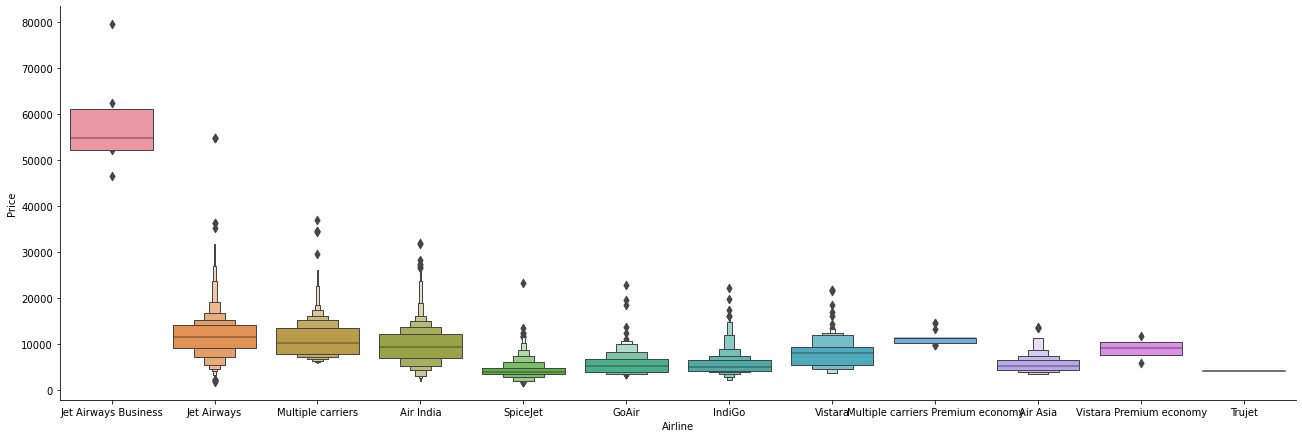

In [16]:
sns.catplot(data= data_train.sort_values("Price", ascending=False), x= "Airline", y="Price",
            height=6,aspect=3,kind="boxen")
plt.show

- Amongst the other airlines 'Jet Airways Business' is the costliest with an average price of around 55K
- whereas other flights have an average ranging from 5k to 12k.

In [17]:
data_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

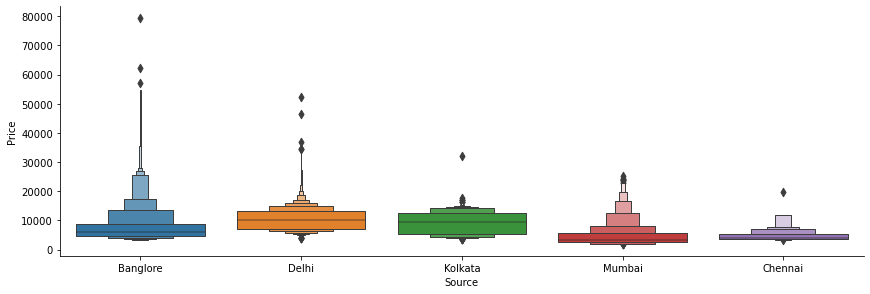

In [18]:
sns.catplot(data= data_train.sort_values("Price", ascending=False), x= "Source", y="Price",
            height=4,aspect=3,kind="boxen")
plt.show

- Costliest Source/Departure is Banglore whereas Chennai being the Cheapeast.
- Delhi has the highest number of takeoffs and Chennai has the lowest

In [19]:
data_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

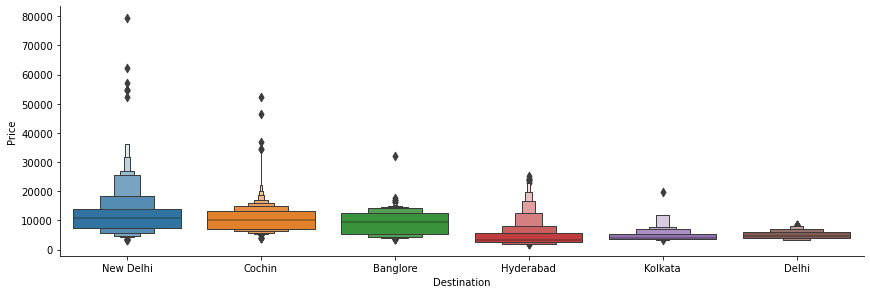

In [20]:
sns.catplot(data= data_train.sort_values("Price", ascending=False), x= "Destination", y="Price",
            height=4,aspect=3,kind="boxen")
plt.show

- Costliest Destination is NewDelhi whereas Delhi being the Cheapeast (since Delhi has Two airports)
- Cochin has the highest number of landings and Kolkata has the lowest

#### 4.1. Nominal data- the data isin any order - use OneHotEnconding - Airline,Source,Destination

In [21]:
def one_hot_encoding(col):
    #data = data_train[[col]]
    col = pd.get_dummies(data_train[[col]], drop_first= True)
    return col

In [22]:
Airline = one_hot_encoding("Airline")
Source = one_hot_encoding("Source")
Destination = one_hot_encoding("Destination")

In [23]:
data_train = pd.concat([data_train,Airline,Source, Destination], axis=1)

In [24]:
data_train.drop(columns = ["Airline","Source", "Destination"], inplace= True)

In [26]:
data_train.head(2)

,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
data_train["Additional_Info"].value_counts(dropna= False)

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [28]:
data_train["Route"].value_counts(dropna= False )

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → RPR → HYD → BLR             1
BOM → RPR → VTZ → HYD             1
CCU → IXA → BLR                   1
BOM → JLR → HYD                   1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [29]:
data_train.drop(columns =["Additional_Info", "Route"], inplace= True)

#### 4.2. Ordinal data - the data isin ordered form- Here,use Label Encoder since the values are combination of numbers and string - Total_Stops

In [30]:
data_train["Total_Stops"].value_counts(dropna= False)

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
data_train.replace({"non-stop":0, "1 stop":1, "2 stops":2 , "3 stops": 3,"4 stops":4 }, inplace= True)

In [32]:
data_train["Total_Stops"].value_counts(dropna= False)

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [33]:
data_train

,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,4,27,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,4,27,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [34]:
data_train.shape

(10682, 30)

# Test Data

In [35]:
data_test = pd.read_excel("data/Test_set.xlsx")
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [36]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [37]:
#Convert into datetime format and check the years
pd.to_datetime(data_test["Date_of_Journey"]).dt.year.value_counts()

2019    2671
Name: Date_of_Journey, dtype: int64

- There are no null values in the dataset
- All the column variables(except price which is the target variables) are object type
- The data is of 2019 year

### Perform the same EDA as Train data

- 1. **Date_of_Journey** is an object type, Convert that into **datetime** and extract its month and day.
- 2. **Dep_Time** and **Arrival_Time** is an object type, Convert that into **datetime** and extract its hours and minutes
- 3. **Duration** is an object type, Convert that into **list** and extract its hours and minutes
- 4. **Categorical data**:
-       4.1. Nominal data- in any order - **use OneHotEnconding** - **Airline,Source,Destination**
-       4.2. Ordinal data - in ordered form- hence use **Label Encoder** - **Total_Stops**

In [38]:
#1.Date_of_Journey is an object type, Convert that into datetime and extract its month and day.
data_test["Journey_month"] = pd.to_datetime(data_test["Date_of_Journey"], format= "%d/%m/%Y").dt.month
data_test["Journey_day"] = pd.to_datetime(data_test["Date_of_Journey"], format= "%d/%m/%Y").dt.day
#Drop the original Column
data_test.drop(columns =["Date_of_Journey"], inplace= True)

#2.Dep_Time and Arrival_Time is an object type, Convert that into datetime and extract its hours and minutes
def hour_and_minute(col):
    data_test[col+"_hour"] = pd.to_datetime(data_test[col]).dt.hour
    data_test[col+"_minute"] = pd.to_datetime(data_test[col]).dt.minute
    return data_test[col+"_hour"], data_test[col+"_minute"]

# call the function for Dep_Time and Arrival_Time columns
hour_and_minute("Dep_Time")
hour_and_minute("Arrival_Time")

#Drop the original columns
data_test.drop(columns = ["Dep_Time", "Arrival_Time"], inplace= True)

#3.Duration is an object type, Convert that into list and extract its hours and minutes

duration = list(data_test["Duration"])
for i in range(len(duration)):
    
    #If the duration contains only hours or only minutes
    if len(duration[i].split()) !=2: 
        # If "h" then Adds 0 minute 
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #strip --> removes spaces at the begining and at the end of the string
        else: #If "m" the  Add "0 hours"
            duration[i] = "0h "  + duration[i]
            
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    duration_minutes.append(int(duration[i].split(sep ="m")[0].split()[-1]))

data_test["duration_hours"] = duration_hours
data_test["duration_minutes"] = duration_minutes

data_test.drop(columns=["Duration"], inplace= True)



#4. Categorical data - Airline,Source,Destination,Total_Stops
#    4.1. Nominal data- the data isin any order - use OneHotEnconding - Airline,Source,Destination

def one_hot_encoding(col):
    col = pd.get_dummies(data_test[[col]], drop_first= True)
    return col

Airline = one_hot_encoding("Airline")
Source = one_hot_encoding("Source")
Destination = one_hot_encoding("Destination")

data_test = pd.concat([data_test,Airline,Source, Destination], axis=1)
data_test.drop(columns = ["Airline","Source", "Destination"], inplace= True)

data_test.drop(columns =["Additional_Info", "Route"], inplace= True)

#    4.2. Ordinal data - the data isin ordered form- hence use Label Encoder - Total_Stops

data_test.replace({"non-stop":0, "1 stop":1, "2 stops":2 , "3 stops": 3,"4 stops":4, "NaN" :0 }, inplace= True)

data_test.shape

(2671, 28)

In [39]:
data_test

,Total_Stops,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,3,27,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,3,6,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,3,6,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


## Feature Selection

In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_month                              10682 non-null  int64
 3   Journey_day                                10682 non-null  int64
 4   Dep_Time_hour                              10682 non-null  int64
 5   Dep_Time_minute                            10682 non-null  int64
 6   Arrival_Time_hour                          10682 non-null  int64
 7   Arrival_Time_minute                        10682 non-null  int64
 8   duration_hours                             10682 non-null  int64
 9   duration_minutes                           10682 non-null  int64
 10  Airline_Air India                          106

plt.figure(figsize = (25,20))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [41]:
data_train.head(2)

,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
X= data_train.drop(columns=["Price"])
y = data_train["Price"]

In [43]:
X.columns

Index(['Total_Stops', 'Journey_month', 'Journey_day', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'duration_hours', 'duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [45]:
etr.feature_importances_

array([2.33864569e-01, 5.40177276e-02, 1.43729495e-01, 2.42841497e-02,
       2.07106728e-02, 2.75339484e-02, 1.84612033e-02, 1.09663672e-01,
       1.81442641e-02, 9.86554766e-03, 1.78858511e-03, 1.77595891e-02,
       1.44354647e-01, 6.78416801e-02, 2.00442048e-02, 8.88722319e-04,
       3.04247263e-03, 1.01834530e-04, 5.18368141e-03, 8.50349226e-05,
       5.74764115e-04, 9.67768060e-03, 3.30460200e-03, 7.08682662e-03,
       1.26153700e-02, 1.43442593e-02, 5.63613484e-03, 4.92238671e-04,
       2.49024210e-02])

In [69]:
feat_imp = pd.Series(etr.feature_importances_, index= X.columns).sort_values(ascending= False)
feat_imp

Total_Stops                                  0.233865
Airline_Jet Airways                          0.144355
Journey_day                                  0.143729
duration_hours                               0.109664
Airline_Jet Airways Business                 0.067842
Journey_month                                0.054018
Arrival_Time_hour                            0.027534
Destination_New Delhi                        0.024902
Dep_Time_hour                                0.024284
Dep_Time_minute                              0.020711
Airline_Multiple carriers                    0.020044
Arrival_Time_minute                          0.018461
duration_minutes                             0.018144
Airline_IndiGo                               0.017760
Destination_Delhi                            0.014344
Destination_Cochin                           0.012615
Airline_Air India                            0.009866
Source_Delhi                                 0.009678
Source_Mumbai               

plt.figure(figsize=(16, 8))
sns.barplot(x =feat_imp[:] , y = feat_imp.index )
plt.show

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

from lazypredict.Supervised import LazyRegressor

### fitting data in LazyRegressor because here we are solving Regression use case. 
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

### fitting data in LazyClassifier
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
rfr = RandomForestRegressor()

In [72]:
def predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("-"*75)
    print("training_score of {} is : {}".format(model, model.score(X_train, y_train)))
    print("Testing_Score of{} is : {}".format(model, model.score(X_test, y_test)))
    
    sns.distplot(y_test-y_pred)
    plt.show()
    print('MAE of {} is : {}'.format(model,metrics.mean_absolute_error(y_test, y_pred)))
    print('MSE of {} is : {}'.format(model,metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE of {} is : {}' .format(model,np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('r2_score of {} is : {}'.format(model,metrics.r2_score(y_test, y_pred))
)
    print("-"*75)


---------------------------------------------------------------------------
training_score of RandomForestRegressor() is : 0.9519345667221913
Testing_Score ofRandomForestRegressor() is : 0.8169781462303892


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


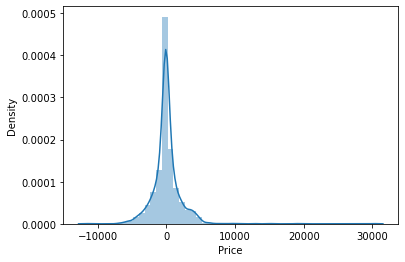

MAE of RandomForestRegressor() is : 1195.9039805591774
MSE of RandomForestRegressor() is : 3990377.0772747137
RMSE of RandomForestRegressor() is : 1997.5928206906215
r2_score of RandomForestRegressor() is : 0.8169781462303892
---------------------------------------------------------------------------


In [51]:
for model in [rfr]:
    predict(model,X_train, X_test, y_train, y_test)

- The score for RandomForestRegressor is best amongst all the three models
- training_score of RandomForestRegressor() is : 0.9543142382730704
- Testing_Score ofRandomForestRegressor() is : 0.8203932700980647
- MAE of RandomForestRegressor() is : 1190.6302050080112
- MSE of RandomForestRegressor() is : 3915918.03472354
- RMSE of RandomForestRegressor() is : 1978.867866918744
- r2_score of RandomForestRegressor() is : 0.8203932700980647

## Hyper Parameter Tuning for RandomForestRegressor

In [52]:
para_grid= {"n_estimators" : [int(x) for x in np.linspace(start=100,stop=1000,num=10)],
            "max_depth" : [int(x) for x in np.linspace(start=5,stop=30,num=6)            ],
            "min_samples_split":[1,2,4,10,15] ,
            "min_samples_leaf":[1,2,4,6,8,10] ,
            "max_features":['auto', 'sqrt'],   
}

In [53]:
from sklearn.model_selection import RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator= rfr, param_distributions= para_grid,n_iter=10,
                                 scoring='neg_mean_squared_error',n_jobs= 1,cv=3,verbose=2,
                                 random_state= 100)

In [54]:
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.1s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.3s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   0.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   0.7s
[CV] n_estimators=1000, min_samples_split=1

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=20 


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, total=   9.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, total=   9.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, total=   9.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, total=   1.9s
[CV] n_estimators=100, min_samples_split=10, min_

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=20, total=   5.0s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=20, total=   5.0s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=20 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=6, max_features=auto, max_depth=20, total=   4.8s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.7s
[CV] n_estimators=100, min_samples_split=15, min

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=5 


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=400, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=300, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=15 


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job

[CV]  n_estimators=300, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=15, total=   0.2s
[CV] n_estimators=300, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=15, total=   0.2s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [1, 2, 4, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [56]:
rf_randomcv.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=15)

In [57]:
prediction = rf_randomcv.predict(X_test)
prediction

array([ 7794.95137611, 10840.17590335, 12349.44395177, ...,
       13406.18367789, 11545.95645177, 14282.58669435])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


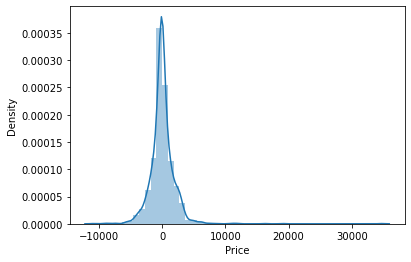

MAE  is : 1185.1070773361441
MSE is : 3862598.5924351313
RMSE  is : 1965.349483535977
r2_score  is : 0.8228388091989086


In [58]:
sns.distplot(y_test-prediction)
plt.show()
print('MAE  is : {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('MSE is : {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('RMSE  is : {}' .format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))
print('r2_score  is : {}'.format(metrics.r2_score(y_test, prediction)))

- After Hyper-parameter Tuning , r2_score has increased from 0.79 to 0.80  

In [64]:
import pickle

In [73]:
with open("model_randomforest.pkl", "wb") as f:
    pickle.dump(rf_randomcv, f) 

In [74]:
with open("model_randomforest.pkl","rb") as f:
    ran_forest = pickle.load(f)

In [75]:
pred = ran_forest.predict(X_test)
pred

array([ 7794.95137611, 10840.17590335, 12349.44395177, ...,
       13406.18367789, 11545.95645177, 14282.58669435])

In [76]:
metrics.r2_score(y_test,pred)

0.8228388091989086